In [2]:
import pandas as pd

# Veriyi yükleme
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# İlk birkaç satırı göster
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# NaN değerleri kontrol etme
df.isnull().sum()

# NaN değerleri kaldırma
df.dropna(inplace=True)

# Gerekli sütunları seçme
df = df[['InvoiceDate', 'UnitPrice', 'Quantity', 'CustomerID']]


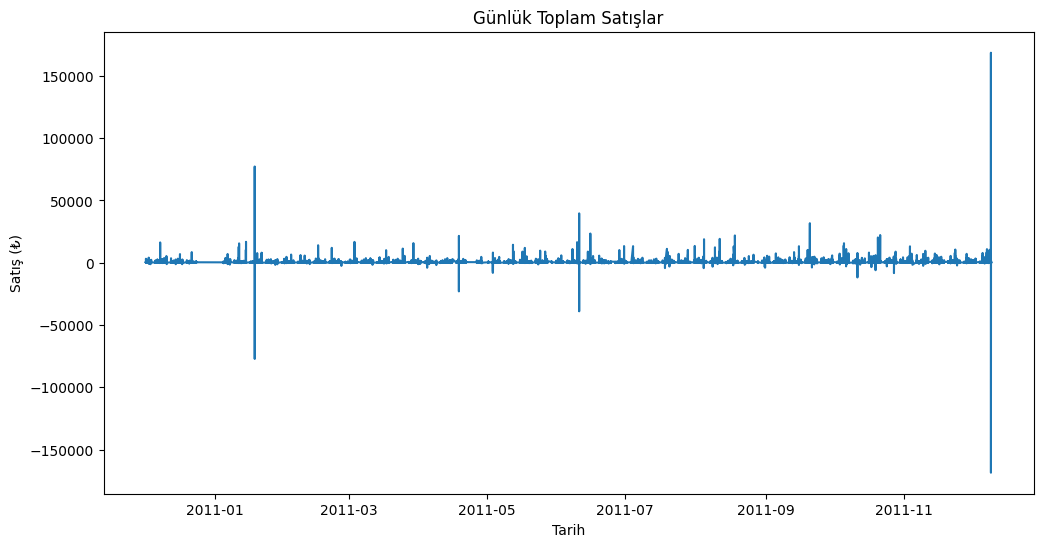

In [4]:
# Tarih sütununu datetime formatına çevirme
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Günlük toplam satışları hesaplama
df['Sales'] = df['UnitPrice'] * df['Quantity']
daily_sales = df.groupby('InvoiceDate').sum()['Sales']

# Satışların görselleştirilmesi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Günlük Toplam Satışlar')
plt.xlabel('Tarih')
plt.ylabel('Satış (₺)')
plt.show()


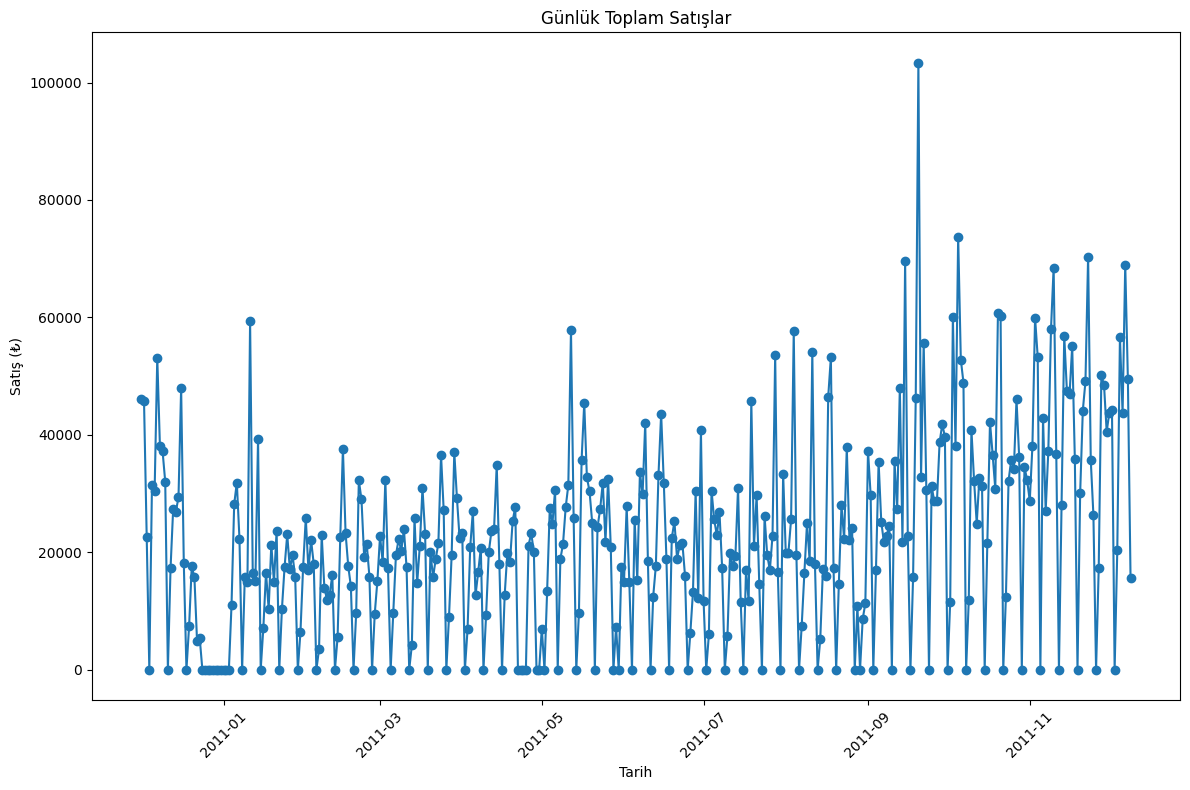

In [7]:
# Tarih sütununu datetime formatına çevirme
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Satışları hesaplama
df['Sales'] = df['UnitPrice'] * df['Quantity']

# Günlük toplam satışları hesaplama
daily_sales = df.resample('D', on='InvoiceDate').sum()['Sales']

# Satışların görselleştirilmesi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Günlük Toplam Satışlar')
plt.xlabel('Tarih')
plt.ylabel('Satış (₺)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


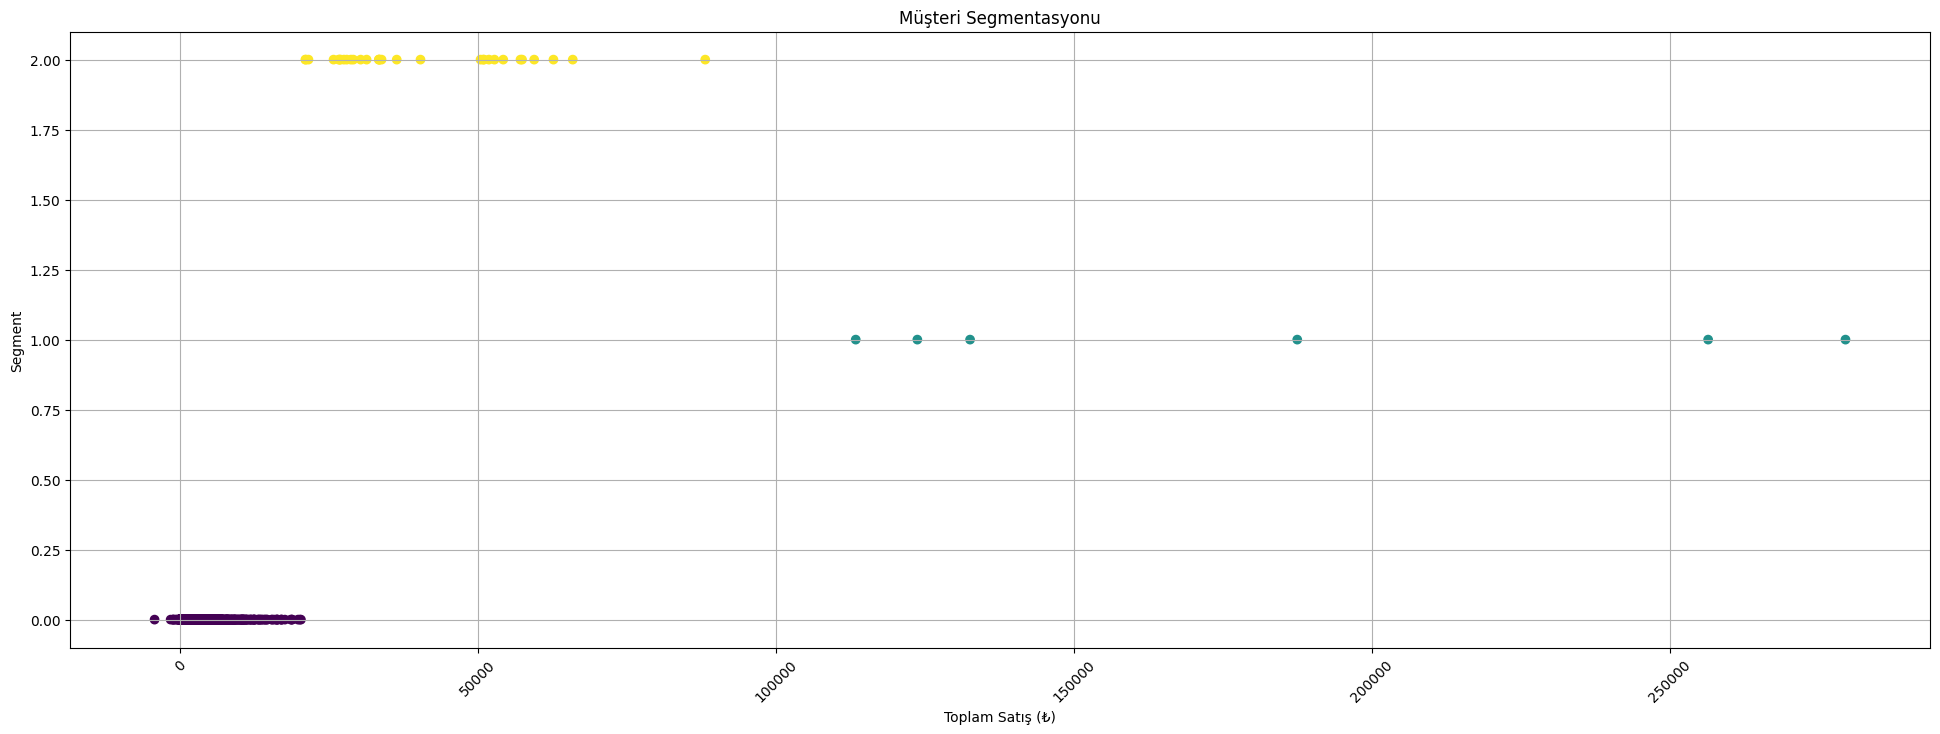

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Müşteri başına toplam satışları hesapla
customer_sales = df.groupby('CustomerID')['Sales'].sum().reset_index()

# KMeans ile segmentasyon
kmeans = KMeans(n_clusters=3, random_state=42)
customer_sales['Segment'] = kmeans.fit_predict(customer_sales[['Sales']])

# Segment sonuçlarını görselleştirme
plt.figure(figsize=(24, 8))
plt.scatter(customer_sales['Sales'], customer_sales['Segment'], c=customer_sales['Segment'], cmap='viridis')
plt.title('Müşteri Segmentasyonu')
plt.xlabel('Toplam Satış (₺)')
plt.ylabel('Segment')
plt.xticks(rotation=45)
plt.grid()
plt.show()